<a href="https://colab.research.google.com/github/vandana2588/Bike-Sharing-Demand-Prediction/blob/main/VP_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


**Importing the required packages**


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Install plotly package to show output in png format so i show it in github
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -0 /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

 **Loading Dataset**

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path ="/content/SeoulBikeData.csv"
df = pd.read_csv(path, header=0, encoding= 'unicode_escape')


In [9]:
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
#Show no of columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
#statistical information
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [13]:
#unique values
df.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**Preprocessing the Dataset**

In [14]:
#Check for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [15]:
#Renaming of the columns
df = df.rename(columns={'Temperature(°C)':'Temperature',
                        'Humidity(%)':'Humidity',
                        'Wind speed (m/s)':'Wind speed',
                        'Visibility (10m)':'Visibility',
                        'Dew point temperature(°C)':'Dew point temperature',
                        'Solar Radiation (MJ/m2)':'Solar Radiation',
                        'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall'})
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [16]:
#Searching for duplicate rows
print('Number of duplicate row in the dataset is:',df.duplicated().sum())

Number of duplicate row in the dataset is: 0


In [17]:
#Numerical Columns
df.describe()


,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [18]:
#Numerical Dataset
df1=df[df.describe().columns]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [19]:
#Converting date column dtype column to object
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.tail()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [20]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'Year',
       'Month', 'Day'],
      dtype='object')

In [21]:
#df.drop(columns=['Date'],axis='columns',inplace=True)
df.drop(axis=1,columns='Date',inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning Day        8760 non-null   object 
 13  Year                   8760 non-null   int64  
 14  Month                  8760 non-null   int64  
 15  Day 

In [23]:
#As per our requirement we can convert categorial variable to binary format for calculation
x=['Seasons', 'Holiday', 'Functioning Day']
y={}
for i in x:
  y[i]=df[i].unique()

**Exploratory Data Analysis(EDA)**

**Comparision between booking on a Holiday and a Normal day**

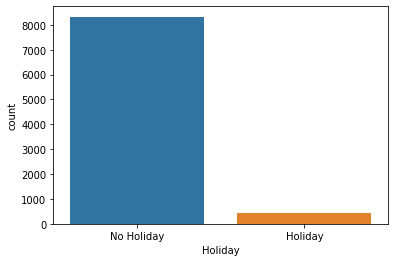

In [24]:
sns.countplot(df['Holiday'])

**Count of number of rented bikes booked on holiday and normal day**

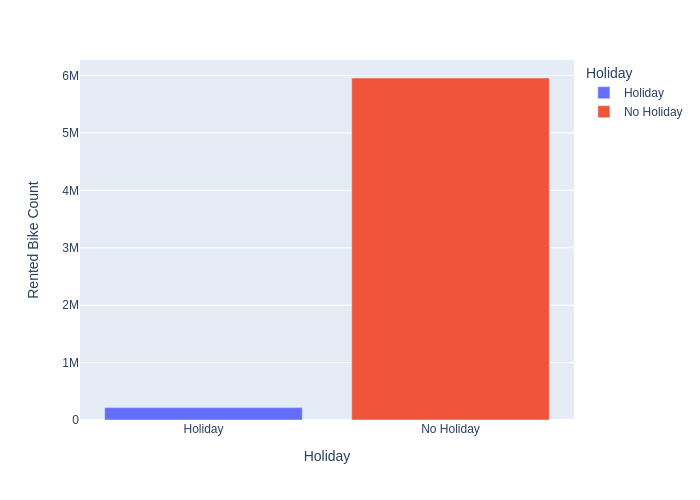

In [25]:
import plotly.express as px
Holiday = df.groupby("Holiday")['Rented Bike Count'].sum().reset_index()
fig = px.bar(Holiday, x='Holiday', y='Rented Bike Count',color='Holiday')
#fig.show()
fig.show(renderer="png")

**Count of bikes used yearly**

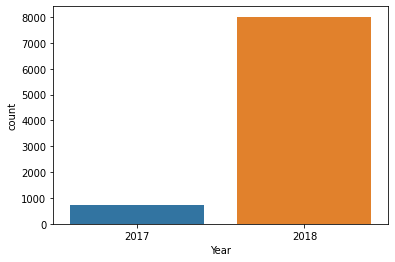

In [26]:
sns.countplot(x='Year', data=df)

In 2018 rented bike using is higher than used in 2017

**Monthly use of rented bikes**

In [27]:
Month = df.groupby('Month')['Rented Bike Count'].sum().reset_index()
fig = px.bar(Month , x='Month' , y='Rented Bike Count' , color = 'Month',height=400)
#fig.show()
fig.show(rendered="png", width=2500, height=1000)

**Rental Booking of Bikes done daily**

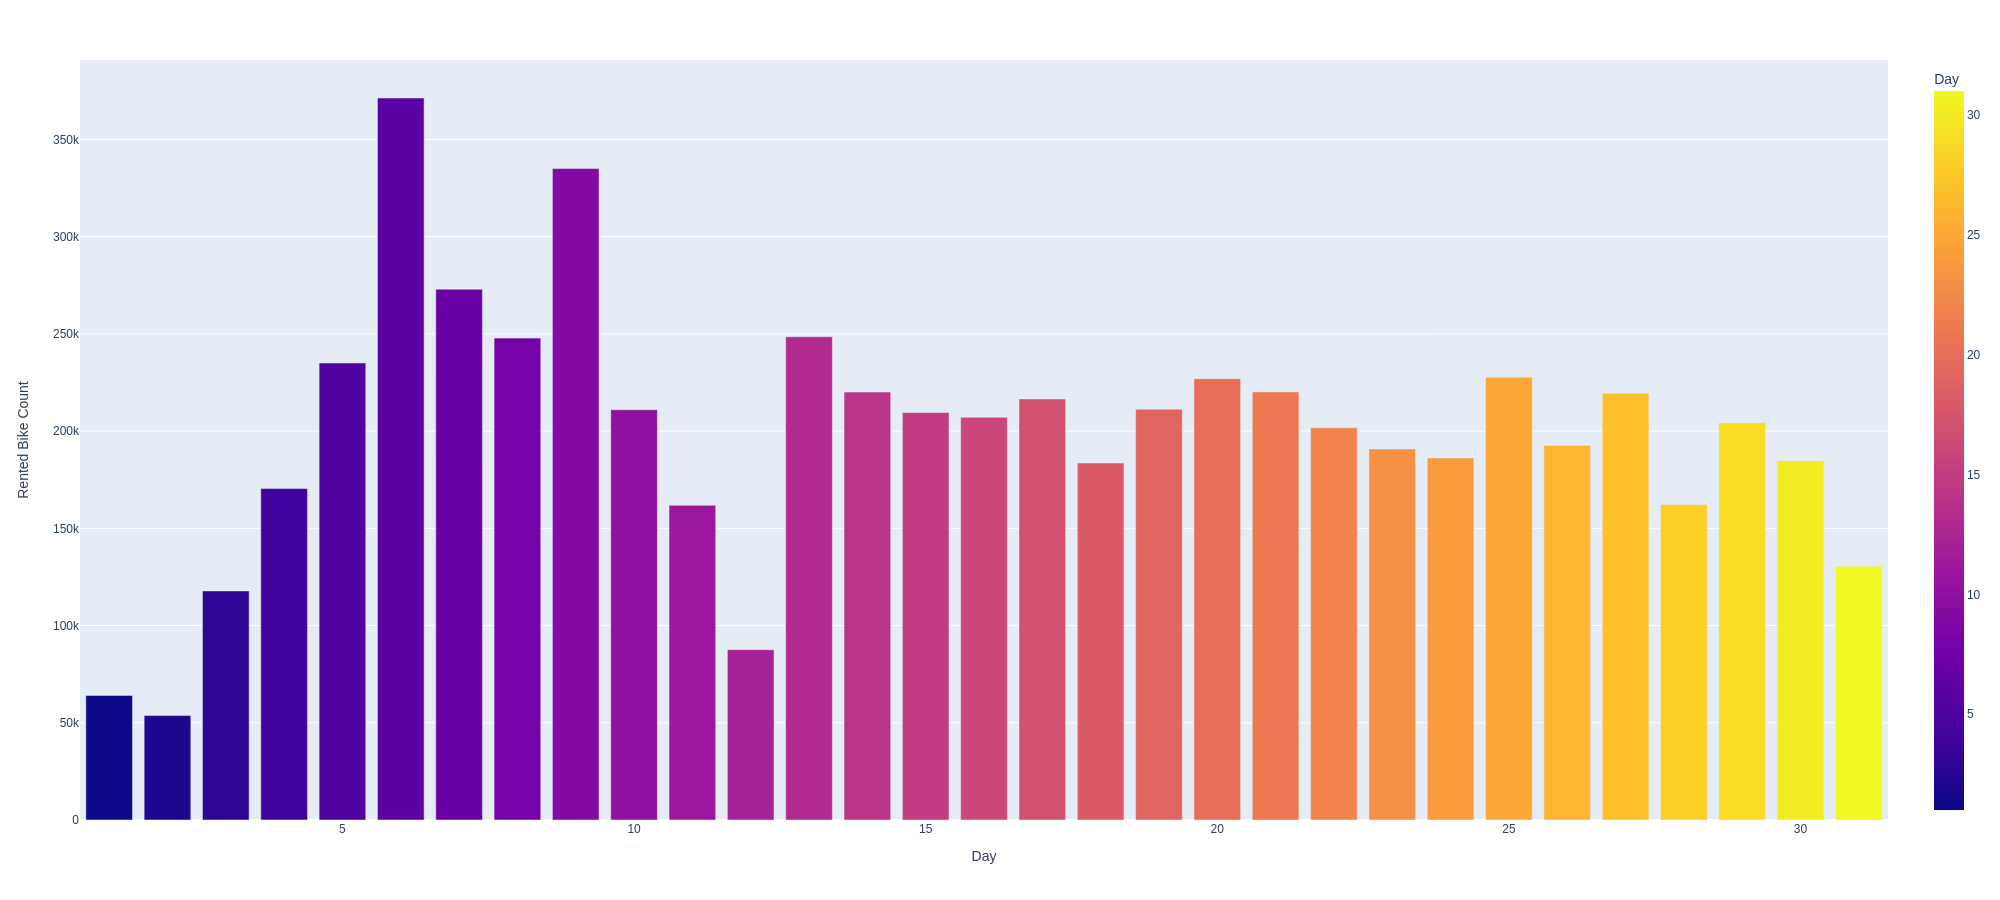

In [28]:
Day = df.groupby("Day").sum().reset_index()
fig = px.bar(Day, x='Day', y='Rented Bike Count',color= 'Day', height=400)
#fig.show
fig.show(renderer="png",width=2000, height=900)

**Booking of Rental bike done during each Season**

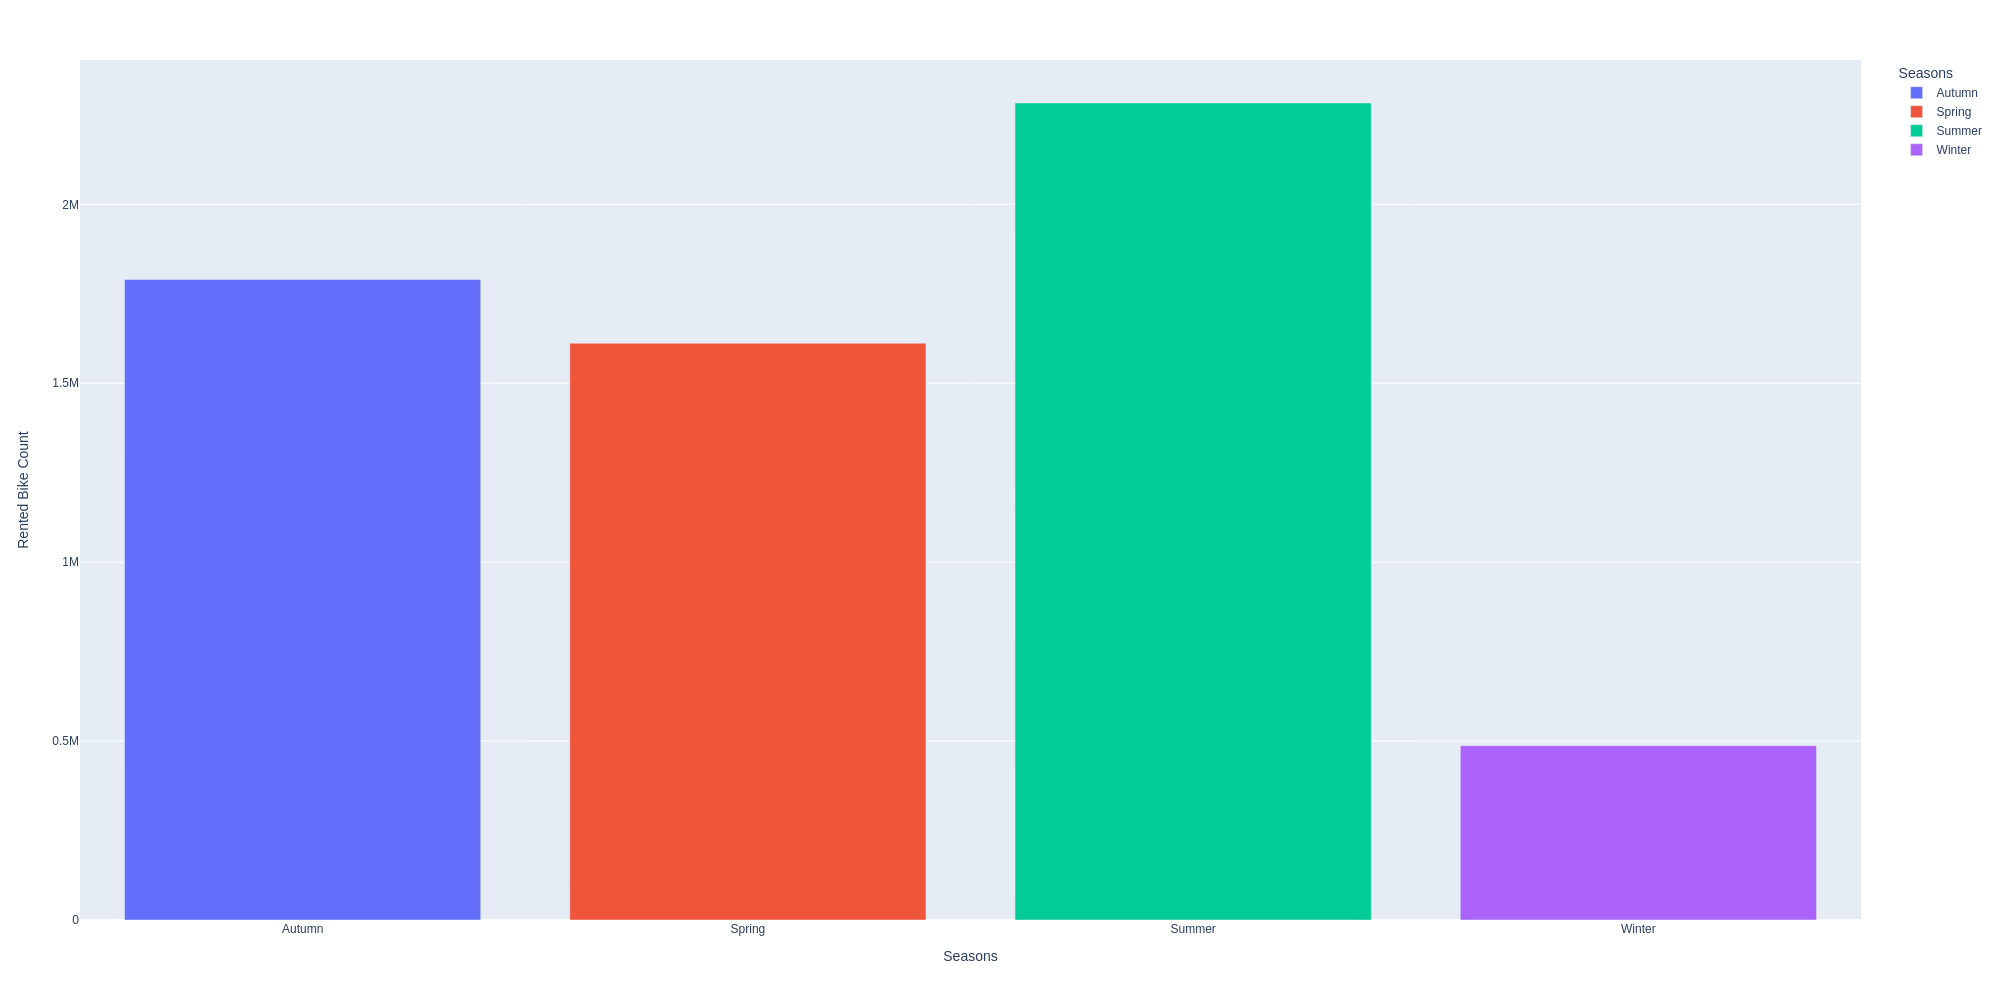

In [29]:
seasons= df.groupby('Seasons').sum().reset_index()
fig = px.bar(seasons, x='Seasons', y='Rented Bike Count', color='Seasons',height=400)
#fig.show()
fig.show(renderer="png",width=2000, height=1000)

**Booking of Bike for no.of hours during Seasons, Holiday and Functioning Day**

In [30]:
x=[]
for i in list(df.columns):
  if i not in df[df.describe().columns]:
    x.append(i)
x   

['Seasons', 'Holiday', 'Functioning Day']

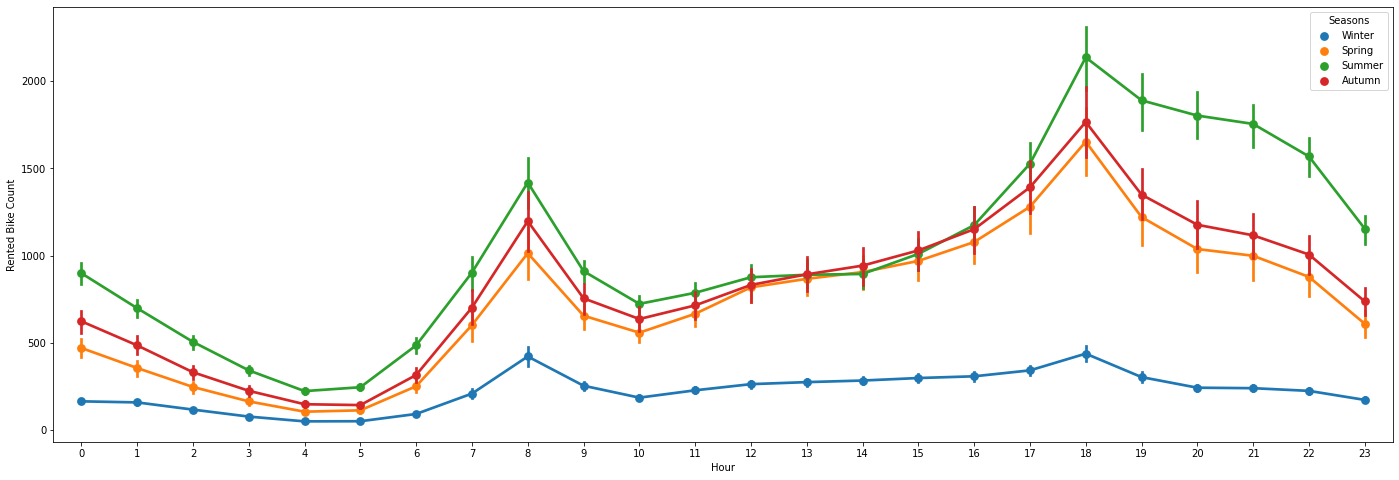

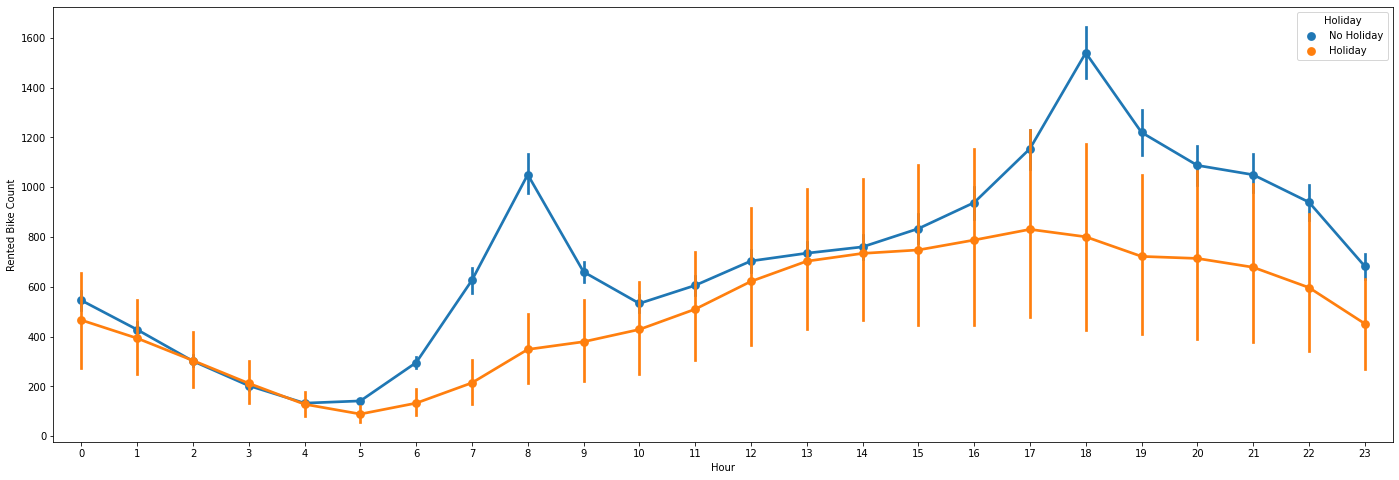

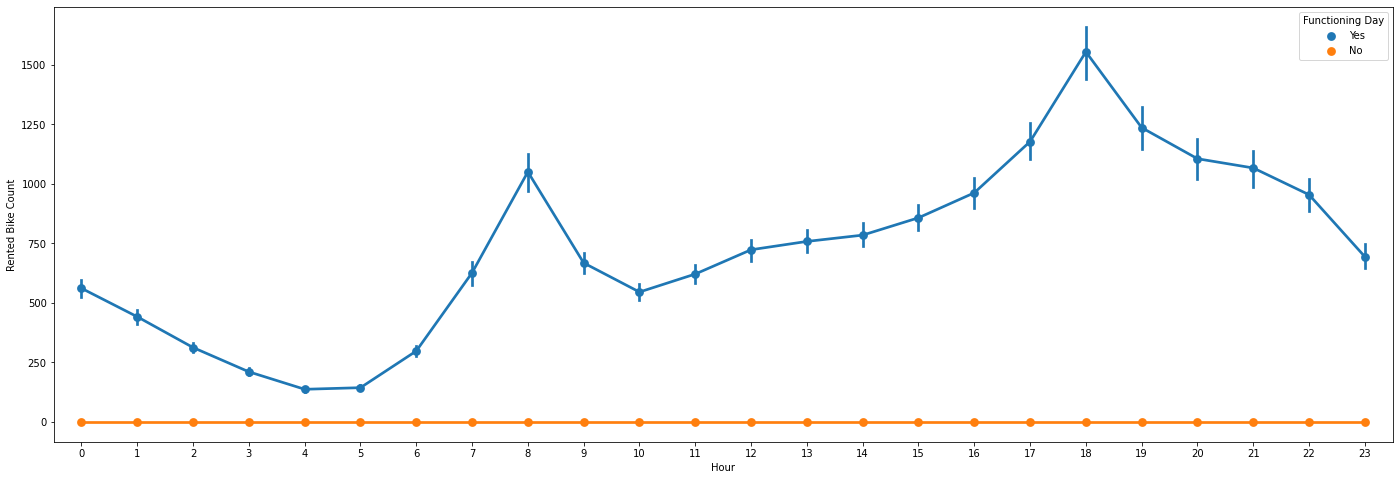

In [31]:
#x=['Holiday','Seasons', 'Functioning Day']
for i in x:

    plt.figure(figsize=(24,8))
    sns.pointplot(data=df, x="Hour", y="Rented Bike Count", hue=i)

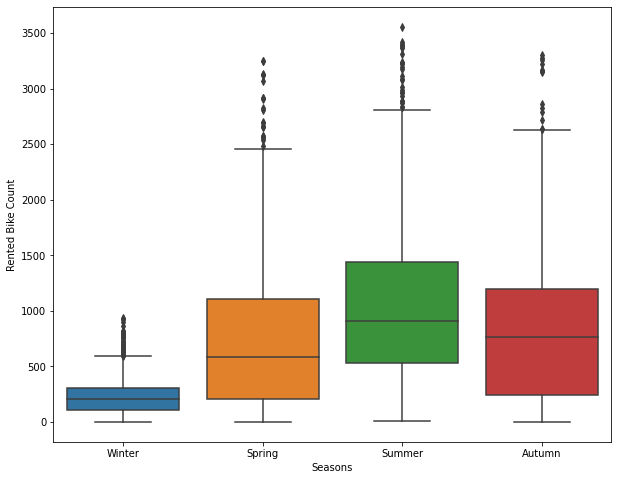

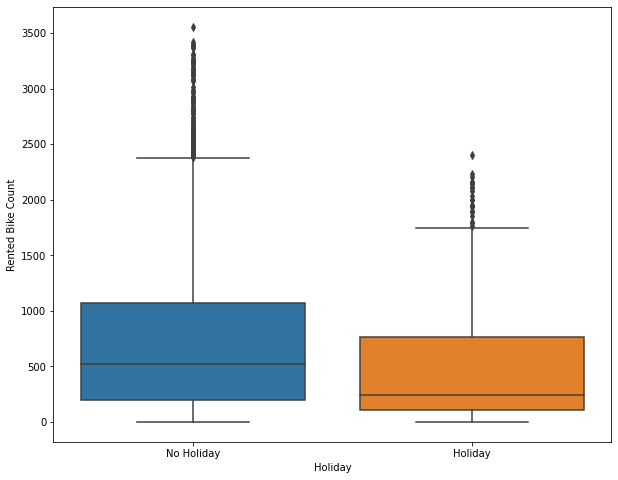

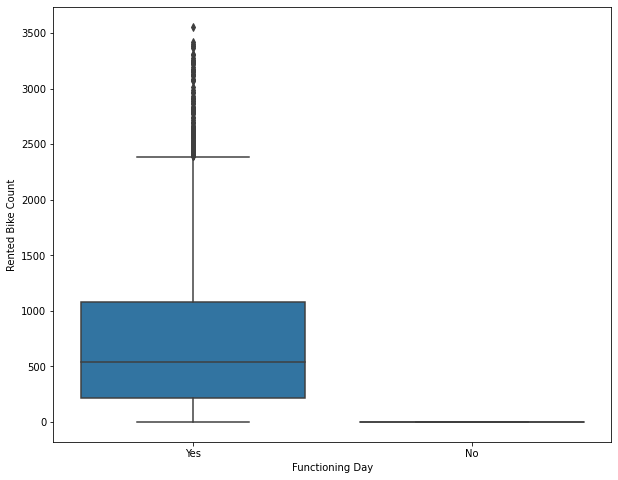

In [32]:
#Ploting Box plot to visualize and trying to get information from plot
for col in x:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

**Regplot shows the correlation between our bike rent with all other factors**

In [33]:
x=list(df1.columns)
len(x)

10

[Text(0.5, 1.0, 'Relation between Snowfall and Rented Bike Count')]

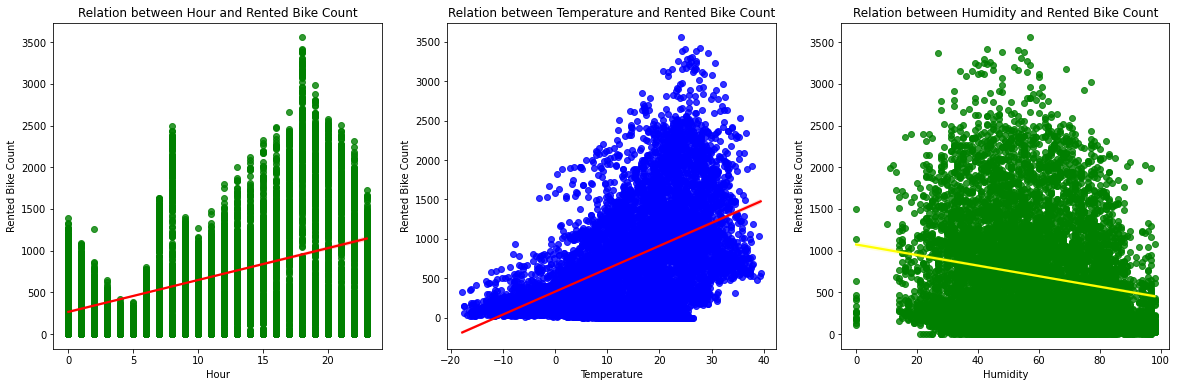

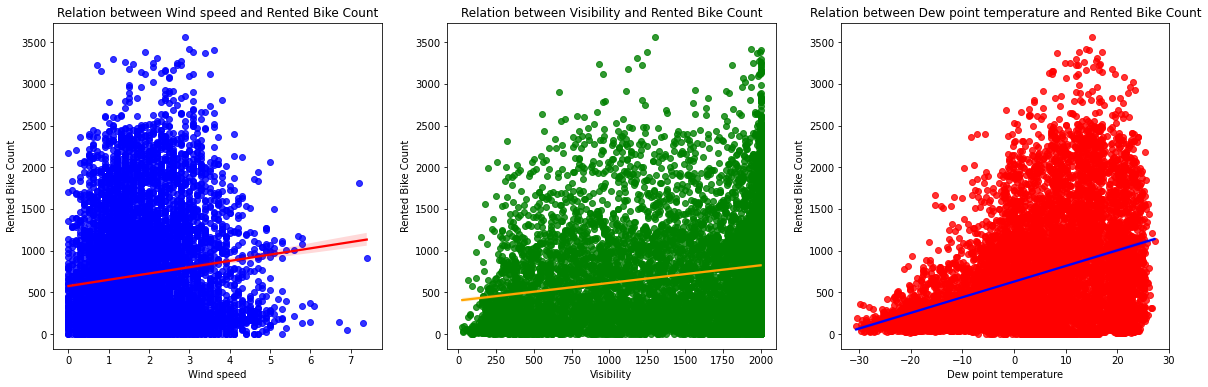

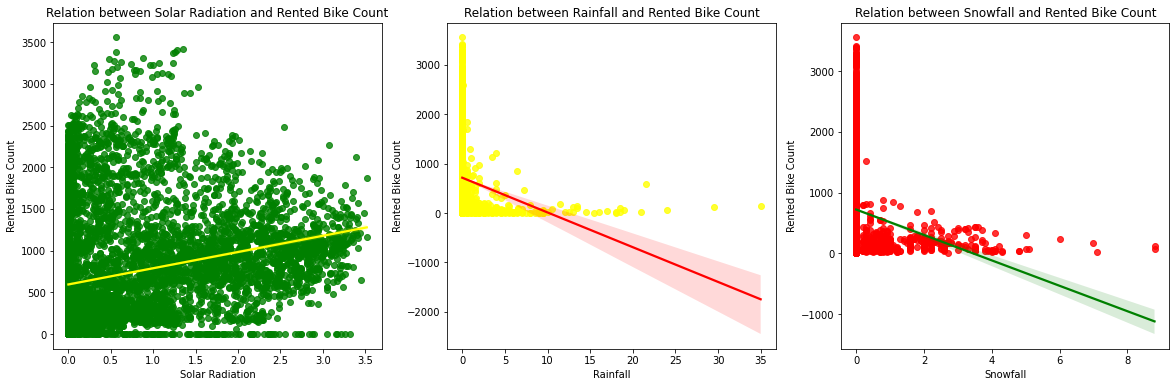

In [34]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[1]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "green"}, line_kws={"color": "red"})
ax1.set(title=f"Relation between {x[1]} and Rented Bike Count")
sns.regplot(x=df[x[2]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax2.set(title=f"Relation between {x[2]} and Rented Bike Count")
sns.regplot(x=df[x[3]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "green"}, line_kws={"color": "yellow"})
ax3.set(title=f"Relation between {x[3]} and Rented Bike Count")
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[4]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax1.set(title=f"Relation between {x[4]} and Rented Bike Count")
sns.regplot(x=df[x[5]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "green"}, line_kws={"color": "orange"})
ax2.set(title=f"Relation between {x[5]} and Rented Bike Count")
sns.regplot(x=df[x[6]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
ax3.set(title=f"Relation between {x[6]} and Rented Bike Count")
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[7]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})
ax1.set(title=f"Relation between {x[7]} and Rented Bike Count")
sns.regplot(x=df[x[8]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "yellow"}, line_kws={"color": "red"})
ax2.set(title=f"Relation between {x[8]} and Rented Bike Count")
sns.regplot(x=df[x[9]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "red"}, line_kws={"color": "green"})
ax3.set(title=f"Relation between {x[9]} and Rented Bike Count")

**Correlation Matrix**

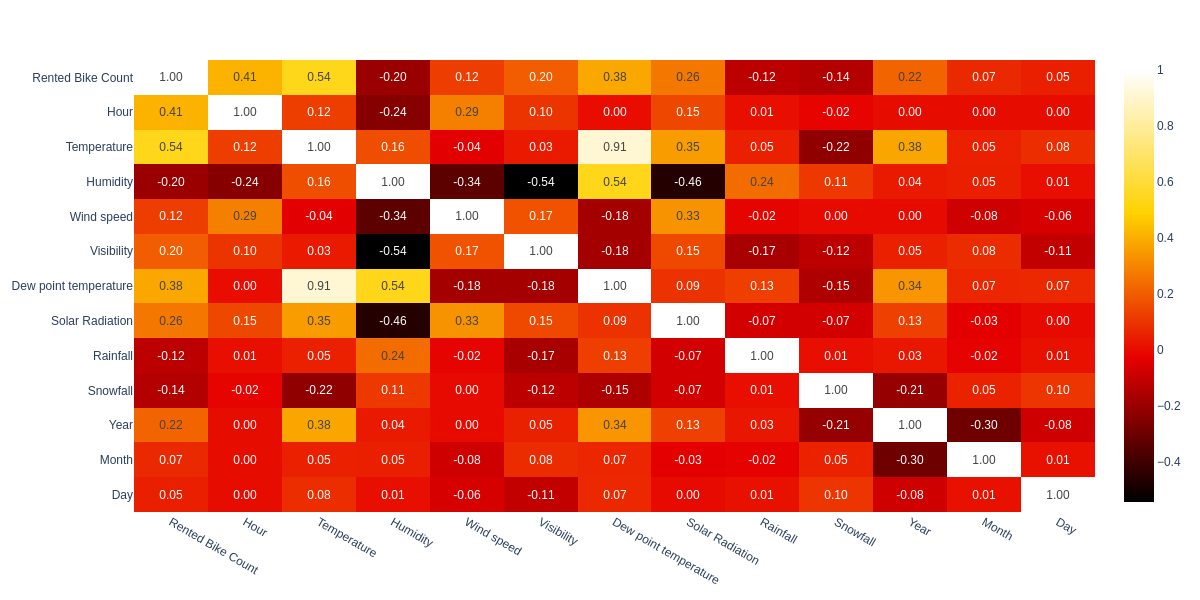

In [35]:
corr = df.corr()
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
# fig.show() 
fig.show(renderer="png",width=1200, height=600)

From the above correlation graph we see that there are High Multicollinearity between temperature and dew point temperature (0.91) so we can add and make them a single temperature column. In 2nd, we see that the day and month are very less correlation with rented bike (0.07), so we have to drop it.

In [36]:
### removing multicollear
df['Total_temp'] = 0.7*df['Temperature'] + 0.4*df['Dew point temperature']
df=df.drop(['Temperature','Dew point temperature'],axis=1)

skewness is:- 1.1532306631480034


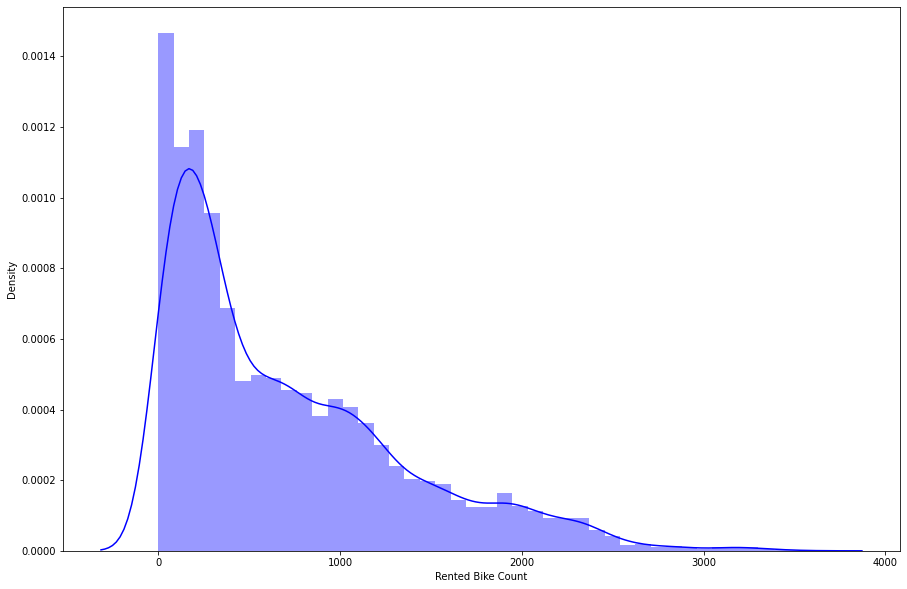

In [37]:
# Dependent variable 'Price'
from scipy.stats.stats import skew
plt.figure(figsize=(15,10))
sns.distplot(df['Rented Bike Count'],color="b")
print('skewness is:-',skew(df['Rented Bike Count']))

skwness is:- 0.23732144485836718


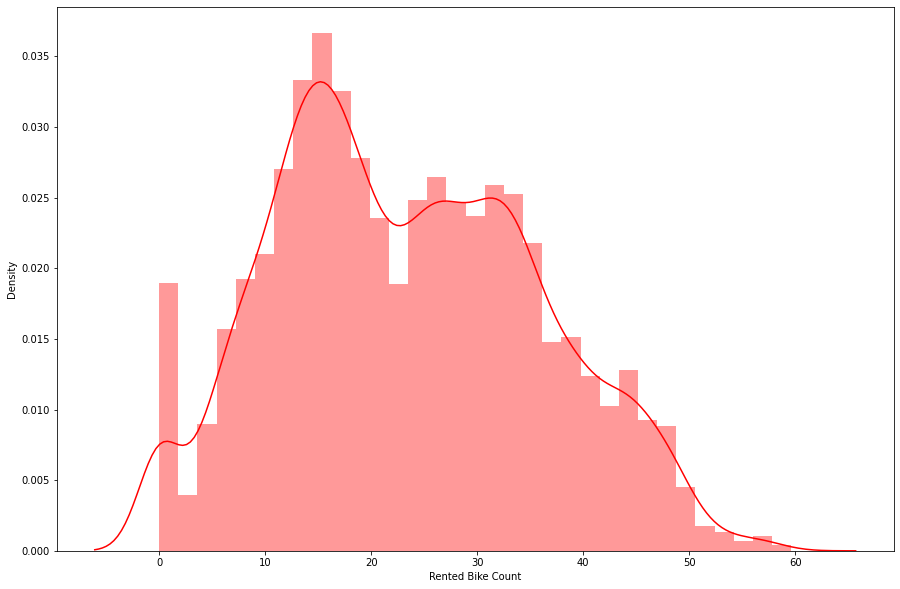

In [38]:
# from scipy.stats.stats import skew
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="r")
# x=1
print('skwness is:-',skew(np.sqrt(df['Rented Bike Count'])))

**Data Encoding**

In [39]:
df.columns


Index(['Rented Bike Count', 'Hour', 'Humidity', 'Wind speed', 'Visibility',
       'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'Day', 'Total_temp'],
      dtype='object')

In [40]:
# convert object type data to dumy variables(binary form)
data=df.copy()
x=['Seasons','Holiday','Functioning Day','Month','Hour']
for i in x:
      data = pd.concat([data, pd.get_dummies(data[i], prefix=i, drop_first=True)], axis=1)
      data = data.drop([i], axis=1)
data.drop(['Year','Day'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Humidity             8760 non-null   int64  
 2   Wind speed           8760 non-null   float64
 3   Visibility           8760 non-null   int64  
 4   Solar Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Year                 8760 non-null   int64  
 8   Day                  8760 non-null   int64  
 9   Total_temp           8760 non-null   float64
 10  Seasons_Spring       8760 non-null   uint8  
 11  Seasons_Summer       8760 non-null   uint8  
 12  Seasons_Winter       8760 non-null   uint8  
 13  Holiday_No Holiday   8760 non-null   uint8  
 14  Functioning Day_Yes  8760 non-null   uint8  
 15  Month_2              8760 non-null   u

In [41]:
#Assign the value in X and Y
x = data.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(data['Rented Bike Count'])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=77)

In [43]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6570, 48) (6570,)
(2190, 48) (2190,)


**APPLY MACHINE LEARNING MODELS**

**Linear Regression Model**

In [45]:
train={}
test={}

In [54]:
# linear regression
reg= LinearRegression().fit(x_train, y_train)

In [55]:
reg.score(x_train, y_train)

0.7629334199581261

In [56]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [58]:
# metrics for linear regressor for train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Linier regreson']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.13314681383164
RMSE : 6.093697302445506
R2 : 0.7629334199581261
Adjusted R2 : 0.7576185223205689


In [59]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Linier regreson']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.273629840755824
RMSE : 6.1052133329438885
R2 : 0.750827145595724
Adjusted R2 : 0.745240832185446


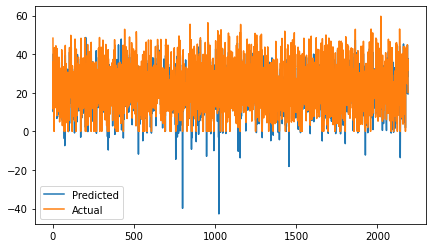

In [61]:
#Compare between y_pred_test vs original y_test
plt.figure(figsize=(7,4))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Decision tree by using decision tree regressor**

In [47]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [7,8,9,10],
          #  "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
          #  "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-41.586 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-49.253 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-44.791 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-59.696 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-58.142 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-52.191 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, splitter=best;, score=-56.361 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, splitter=best;, score=-56.989 total time=   0.0s
[CV 3/3] END ma

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [48]:
#importing the decision tree model for training 
decision_regressor =  DecisionTreeRegressor(criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=80,splitter='best')
decision_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_leaf_nodes=80)

In [49]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(x_train)
y_pred_test_dt = decision_regressor.predict(x_test)

In [50]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(x_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['DecisionTreeRegressor']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.7954152088220128
MSE : 32.04533125397695
RMSE : 5.660859586138571
R2 : 0.7954152088220128
Adjusted R2 : 0.7908285343817777


In [51]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['DecisionTreeRegressor']=MSE,RMSE,r2,1-(1-r2_score((y_test), (y_pred_test_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 34.876743604873255
RMSE : 5.905653529023969
R2 : 0.7668502425580743
Adjusted R2 : 0.761623157851296


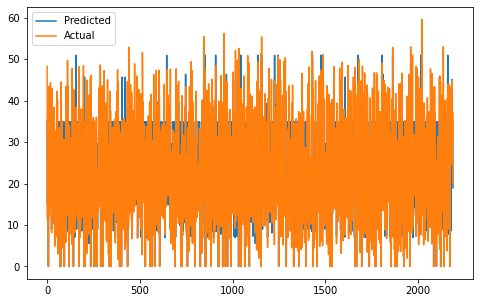

In [52]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()